# **KAU Deep Learning (Spring 2025)**

**NOTE**
Some descriptions & codes from the below resources:
1. cs231n lecture at Stanford Univ.
2. https://cs231n.github.io/python-numpy-tutorial/
2. https://neptune.ai/blog/pil-image-tutorial-for-machine-learning
3. http://scipy-lectures.org/intro/numpy/operations.html (It has the best figure about Numpy broadcasting!)
----


##1. Numpy

Numpy is the core library for scientific computing in Python.

It provides a high-performance multidimensional array object, and tools for working with these arrays.

If you are already familiar with MATLAB, you might find this [tutorial](http://wiki.scipy.org/NumPy_for_Matlab_Users) useful to get started with Numpy.

To use Numpy, we first need to import the `numpy` package:

In [ ]:
import numpy as np

### Numpy Array

A numpy array is a grid of values, all of the *same type*, and is indexed by a tuple of nonnegative integers.

The number of dimensions is the **rank** of the array; the shape of an array is a **tuple** of integers giving the size of the array along each dimension.

In [ ]:
a = np.array([1, 2, 3])  # Create a rank 1 array
b = [1,2,3] # Python list

print(type(a),type(b) )
print(a.shape)      # dimension:(3,)  rank: 1
print( a[0], a[1], a[2], b[0], b[1], b[2])

# Change an element of the array
a[0] = 41
b[0] = 'hello'

print(a)
print(b)

<class 'numpy.ndarray'> <class 'list'>
(3,)
1 2 3 1 2 3
[41  2  3]
['hello', 2, 3]


In [ ]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b)
print(b.shape) # dimension: (2,3)
print(b.size)  # size: 2x3=6
print(b[0][0], b[0, 1], b[1, 1]) # indexing

[[1 2 3]
 [4 5 6]]
(2, 3)
6
1 2 5


Numpy also provides many functions to create arrays:

In [ ]:
a = np.zeros( (3,5) )  # Create an array of all zeros
print(a)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [ ]:
b = np.ones( (5,2) ) # Create an array of all ones
print(b)

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


In [ ]:
# 0과 1 이외의 값으로 행렬을 구성하고 싶을 때 사용
c = np.full( (5,2), 3.14 )   # Create a constant array
#c = np.ones( (5,2) ) * 3.14
print(c)

[[3.14 3.14]
 [3.14 3.14]
 [3.14 3.14]
 [3.14 3.14]
 [3.14 3.14]]


In [ ]:
# 대각 행렬 명령어---정방행렬으로만 적용 가능
d= np.eye(3)  # Create a 2x2 identity matrix
print(d)

d = np.eye(3)  * 4.15      # Create a 2x2 identity matrix
print(d)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[4.15 0.   0.  ]
 [0.   4.15 0.  ]
 [0.   0.   4.15]]


In [ ]:
e = np.random.random((6,6))  # Create an array filled with random values 0~1사이 값
print(e)

# Make Uniform(-1, 1)
# Make Uniform(0, 100), integer value
####### YOUR CODE HERE #######
rand_arr1=(np.random.random((6,6)) -0.5)*2 # -1 ~ 1 사이값 랜덤으로 나오게
print(rand_arr1)

rand_arr2=np.round((np.random.random((6,6)) -0.5)*2) # -1 ~ 1 사이값 랜덤 + 반올림 추가
print(rand_arr2)


[[0.14055241 0.37389938 0.3120153  0.23797636 0.58970132 0.34332442]
 [0.3829818  0.09186067 0.57843863 0.24577359 0.35304922 0.23829141]
 [0.53296381 0.86080895 0.62919316 0.55952647 0.13006739 0.16125433]
 [0.50027569 0.35841142 0.30035265 0.80720545 0.52569109 0.78019465]
 [0.81715416 0.14147602 0.30224086 0.59022621 0.77542122 0.87599648]
 [0.86252663 0.84156736 0.19695131 0.80175358 0.99381688 0.70023796]]
[[ 0.65543418  0.24218445  0.06790326 -0.85217403  0.92238031 -0.0349013 ]
 [ 0.64222716 -0.41667617 -0.68874695 -0.22449557  0.30748954  0.36612927]
 [ 0.52570267  0.08780833  0.97994086  0.08017301 -0.8432063  -0.57905121]
 [ 0.72511099  0.68840793  0.07511656  0.66509672 -0.36833183  0.01270656]
 [-0.15594307  0.10596481  0.6406873  -0.96605413  0.73899113 -0.41299964]
 [ 0.81958491  0.94592289  0.84402817  0.10814411 -0.4823213   0.45739039]]
[[-1.  0. -0.  1.  0. -1.]
 [-0.  1. -0. -0.  0. -0.]
 [-1. -0.  1.  0.  1. -1.]
 [-0. -1. -1. -1.  0.  1.]
 [-0.  0.  0. -0. -1.  1.]

###Array indexing & Slicing

Numpy offers several ways to index into arrays.

**Slicing**: Similar to Python lists, numpy arrays can be sliced.

Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [ ]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
b = a[:2, 1:]
print(b)

[[2 3 4]
 [6 7 8]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [ ]:
print(a[0, 1])
b[0, 0] = 31    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1]) # Check out the original array
print(a) # 처음 행렬인 a의 요소가 바뀜

# 이런 현상을 방지하기 위해 a의 행렬을 카피해서 새로운 행렬에서 변경을 진행하면 됨

# If you want to avoid this situation, use np.copy()
####### YOUR CODE HERE #######
print('===========after using np.copy=====')
b=a[:2, 1:].copy() # a의 부분을 추출한 행렬을 새로운 변수인 b에다가 복사
b[0,0]=31 #새롭게 복사한 행렬 b에서 교체
print(a)

2
31
[[ 1 31  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
===========after using np.copy=====
[[ 1 31  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Two ways of accessing the data in the middle row of the array.

Method 1: Mixing integer indexing with slices
--> It yields an array of lower rank

Method 2: Using only slices
--> It yields an array of the same rank as the original array

In [ ]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)
print('='*50)

# Method 1: Mixing integer indexing with slices
row_r1 = a[1, :]    # Rank 1 view of the second row of a

# Method 2: Using only slices
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a

print('Method 1: ', row_r1, row_r1.shape) # rank 1 로 출력
print('Method 2: ', row_r2, row_r2.shape) # rank 2 로 출력

# Check the matrix multiplication (Matrix * vector)
M = np.eye(4)
print(row_r2 @ M ) # rank가 1인 row_r1은 계산오류가 나와야 정상

# Change the rank  : np.reshape(), np.squeeze(), np.expand_dims(a,axis)
####### YOUR CODE HERE #######
new_row_r1 = row_r1.reshape(1,4)
print('Method 1: ',new_row_r1, new_row_r1.shape) # rank 2 로 변경

new_row_r2 = row_r2.squeeze(axis=0)
print('Method 2: ', new_row_r2, new_row_r2.shape) # rank 2 로 출력


[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
Method 1:  [5 6 7 8] (4,)
Method 2:  [[5 6 7 8]] (1, 4)
[[5. 6. 7. 8.]]
Method 1:  [[5 6 7 8]] (1, 4)
Method 2:  [5 6 7 8] (4,)


In [ ]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print(col_r2, col_r2.shape)

[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


Integer array indexing: When you index into numpy arrays using **slicing**, the res|ulting array view **will always be a subarray of the original array**.

In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array.

Here is an example:

In [ ]:
a = np.array([[1,2], [3, 4], [5, 6]])
# a =
# [[ 1  2 ]
#  [ 3  4 ]
#  [ 5  6 ]]

# An example of integer array indexing.
# The returned array will have shape (3,) and
print(a[[0, 1, 2], [0, 1, 0]])

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

[1 4 5]
[1 4 5]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [ ]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [ ]:
# Create an array of indices
b = np.array([0, 1, 0, 1])
print(b)

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]", np.arange(4) : [0,1,2,3]
# indices : (0,0), (1,1), (2,0), (3,1)

[0 1 0 1]
[ 1  5  7 11]


In [ ]:
# Mutate one element from each row of a using the indices in b
print(a)
a[np.arange(4), b] += 10
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[11  2  3]
 [ 4 15  6]
 [17  8  9]
 [10 21 12]]


Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array.

Frequently this type of indexing is used to select the elements of an array that satisfy some condition.

Here is an example:

In [ ]:
import numpy as np

# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values of bool_idx

a = np.array([[1,-3], [-2, 4], [-5, 6]])
print(a)
bool_idx = (a < 2)
print(bool_idx)

# Make all negative values into zeros
####### YOUR CODE HERE #######
# 최대한 반복문을 사용하지 않고 변경하는 것이 핵심!!!
a[a<0]=0
print(a)


[[ 1 -3]
 [-2  4]
 [-5  6]]
[[ True  True]
 [ True False]
 [ True False]]
[[1 0]
 [0 4]
 [0 6]]


### Datatypes

Every numpy array is a grid of elements of the same type.

Numpy provides a large set of numeric datatypes that you can use to construct arrays.

Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype.

Here is an example:

In [ ]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1, 2], dtype=np.float64)  # Let numpy choose the datatype
#z = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1.0, 2.0]).astype('int64')  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

int64 float64 int64


### Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [ ]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]]).astype('float64')
# x = [[1,2],  y = [[5,6],
#      [3,4]]       [7,8]]

# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [ ]:
# Elementwise difference; both produce the array
# x = [[1,2],  y = [[5,6],
#      [3,4]]       [7,8]]
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [ ]:
# Elementwise product; both produce the array
# x = [[1,2],  y = [[5,6],
#      [3,4]]       [7,8]]
print(x * y)   #요소곱          # MATLAB  .*  ; element operation
#print(np.multiply(x, y))
print(x @ y) # 행렬곱

print(x **2) # 각 요소별로 제곱

[[ 5. 12.]
 [21. 32.]]
[[19. 22.]
 [43. 50.]]
[[ 1.  4.]
 [ 9. 16.]]


In [ ]:
# Elementwise division; both produce the array
# x = [[1,2],  y = [[5,6],
#      [3,4]]       [7,8]]
print(x / y)
print(np.divide(x, y))
print('='* 50)
print(x % y)
print(np.remainder(x,y))
print('='* 50)
print(x // y)
print(np.floor_divide(x,y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[1. 2.]
 [3. 4.]]
[[1. 2.]
 [3. 4.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


In [ ]:
# Elementwise square root; produces the array
# x = [[1,2]
#      [3,4]]
print(np.sqrt(x))
print(x**0.5)

[[1.         1.41421356]
 [1.73205081 2.        ]]
[[1.         1.41421356]
 [1.73205081 2.        ]]


Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication.

We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices.

**dot** is available both as a function in the numpy module and as an instance method of array objects:

In [ ]:
v = np.array([9, 10])   # ,x2 vector
w = np.array([11, 12])  # ,x2 vector
# elementwise multiplication
print(v*w)
print('='* 50)

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

print('='* 50)
# You can also use the @ operator which is equivalent to numpy's dot operator.
print(v @ w)

[ 99 120]
219
219
219


In [ ]:
# Matrix / vector product; both produce the rank 1 array [29 67]
# x = [[1,2],    v = [9,10]
#      [3,4]]
print(x.dot(v)) # [1 2; 3 4] (2 x 2) dot [9 10]^T ) (2 x 1) = (2 x 1)
print(np.dot(x, v))
print(x @ v)

[29. 67.]
[29. 67.]
[29. 67.]


In [ ]:
# Matrix / matrix product; both produce the rank 2 array
# x = [[1,2],     y = [[5,6],
#      [3,4]]          [7,8]]
print(x.dot(y))
print(np.dot(x, y))
print(x @ y)

[[19. 22.]
 [43. 50.]]
[[19. 22.]
 [43. 50.]]
[[19. 22.]
 [43. 50.]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:
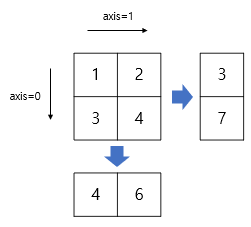

In [ ]:
x = np.array([[1,2],[3,4]])

print( np.sum(x) )      # Compute sum of all elements; prints "10"
print( np.sum(x, axis=0) )      # Compute sum of each column; prints "[4 6]" #열방향 (y축)
print( np.sum(x, axis=1) )      # Compute sum of each row; prints "[3 7]" #행방향 (x축)

10
[4 6]
[3 7]


### Reshaping a matrix

In [ ]:
x = np.random.random((4,4))  # (0,1) uniform random number
print(x)
print(x.shape)

y = x.reshape(16,)
print(y) # 한줄로 출력
print(y.shape)
print(x.reshape(-1,).shape) #(16,)  # flatten
print(x.reshape(8,2).shape) #(8,2)
print(x.reshape(8,-1).shape) #(8,2)
print(x.reshape(8,-1))

[[0.88509214 0.02358834 0.88912816 0.12160113]
 [0.51569677 0.19834257 0.44812819 0.82448282]
 [0.67691599 0.47154206 0.67736813 0.32793612]
 [0.24273939 0.28201888 0.17639423 0.24311349]]
(4, 4)
[0.88509214 0.02358834 0.88912816 0.12160113 0.51569677 0.19834257
 0.44812819 0.82448282 0.67691599 0.47154206 0.67736813 0.32793612
 0.24273939 0.28201888 0.17639423 0.24311349]
(16,)
(16,)
(8, 2)
(8, 2)
[[0.88509214 0.02358834]
 [0.88912816 0.12160113]
 [0.51569677 0.19834257]
 [0.44812819 0.82448282]
 [0.67691599 0.47154206]
 [0.67736813 0.32793612]
 [0.24273939 0.28201888]
 [0.17639423 0.24311349]]


### Transposing a matrix
To transpose a matrix, simply use the T attribute of an array object:

In [ ]:
x = np.array([[1,2],[3,4]])
print(x)
print("transpose\n", x.T) # transpose 연산 명령어 (=전치)

[[1 2]
 [3 4]]
transpose
 [[1 3]
 [2 4]]


In [ ]:
v = np.array([[[1,2,3],[4,5,6]]])
print(v )
print(v.shape)
print("transpose\n", v.T)
print(v.T.shape)

[[[1 2 3]
  [4 5 6]]]
(1, 2, 3)
transpose
 [[[1]
  [4]]

 [[2]
  [5]]

 [[3]
  [6]]]
(3, 2, 1)


###Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of **different shapes** when performing arithmetic operations.

Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [ ]:
import numpy as np

In [ ]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])

y = np.empty_like(x)   # Create an empty matrix with the same shape as x
print(y)
y = np.zeros_like(x)
print(y)
# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4) :
  y[i,:] = x[i,:] + v  # (1,3)

print(y)

[[10922     0     0]
 [    0     0     0]
 [    0     0     0]
 [    0     0     0]]
[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


This works; however when the matrix x is very large, computing an explicit loop in Python could be slow.

Note that adding the vector v to each row of the matrix x is equivalent to forming a matrix vv by stacking multiple copies of v vertically, then performing elementwise summation of x and vv.

We could implement this approach like this:

In [ ]:
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
print(vv)                # Prints "[[1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]]"

y = x + vv  # Add x and vv elementwise
print(y)

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:
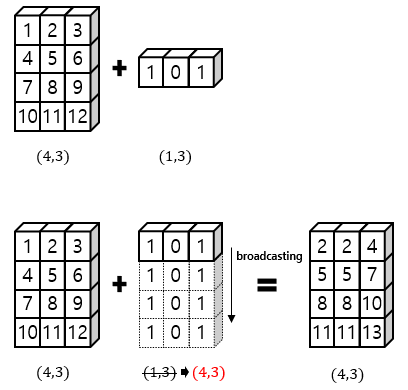

In [ ]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting 차원이 안맞지만 자동으로 연산가능하도록 지원
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if v actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
4. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation from the [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or this [explanation](http://wiki.scipy.org/EricsBroadcastingDoc).

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the [documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are some applications of broadcasting:

In [ ]:
# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
v = [1,0,1]
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:

print(x + v)

[[2 2 4]
 [5 5 7]]


In [ ]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
y = x * np.array([ 1, 1, 0])
print(y)


[[ 1  2  0]
 [ 4  5  0]
 [ 7  8  0]
 [10 11  0]]


This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete.

Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

### How to handle Matrices (Tensors) in Pytorch?
### Pytorch
- Pytorch is a Python-based open-source machine learning library for implementing deep learning released in 2016 from Facebook.
- It is currently the most commonly used deep learning framework with TensorFlow.
- The tensor operation is very similar to the numpy array operation.


In [ ]:
# Creating tensor
import torch
A = torch.zeros(2,2) # ≒ np.zeros()
print(A)
print(type(A))
B = torch.ones(2,2) # ≒ np.ones()
print(B)
C = torch.rand(2,2) # ≒ np.random()
print(C)
D = torch.Tensor([[1,2],[3,4]])
print(D)

tensor([[0., 0.],
        [0., 0.]])
<class 'torch.Tensor'>
tensor([[1., 1.],
        [1., 1.]])
tensor([[0.2283, 0.1035],
        [0.1165, 0.1606]])
tensor([[1., 2.],
        [3., 4.]])


In [ ]:
# operating
# B = [[1,1],   D = [[1,2],
#      [1,1]]        [3,4]]
print(D+B)
print(D-B)

# sum
print(torch.sum(D,dim=0)) # dim = axis

# broadcasting
E = torch.Tensor([1,0])
print(D+E)

tensor([[2., 3.],
        [4., 5.]])
tensor([[0., 1.],
        [2., 3.]])
tensor([4., 6.])
tensor([[2., 2.],
        [4., 4.]])


##2. Matplotlib

Matplotlib is a plotting library. In this section give a brief introduction to the matplotlib.pyplot module, which provides a plotting system similar to that of MATLAB.

In [ ]:
import matplotlib.pyplot as plt

### Plotting

The most important function in matplotlib is plot, which allows you to plot 2D data. Here is a simple example:

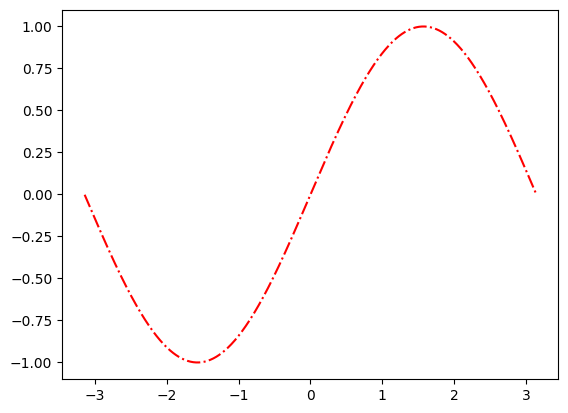

In [ ]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(-3.14, 3.14, 0.01)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y, 'r-.')

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

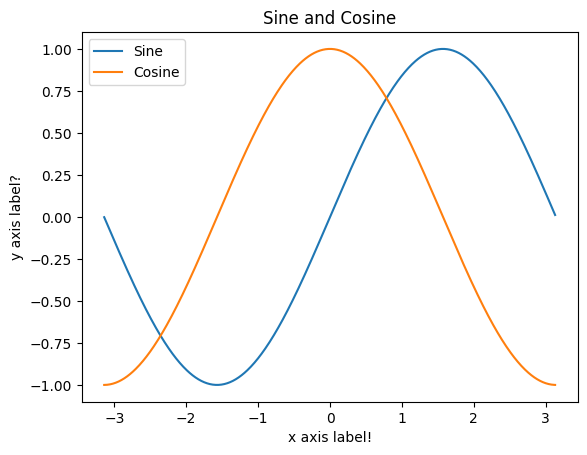

In [ ]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)

plt.xlabel('x axis label!')
plt.ylabel('y axis label?')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

### Subplots

You can plot different things in the same figure using the subplot function. Here is an example:

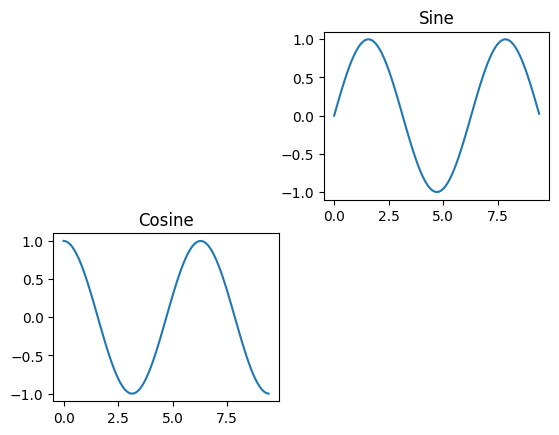

In [ ]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# The position of the subplot described by one of Three integers (nrows, ncols, index)
# index : start with 1 (not 0)
plt.subplot(2, 2, 2)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')
plt.subplot(2, 2, 3)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

## 3. OpenCV

OpenCV (Open Source Computer Vision Library) is an open source software library for computer vision and machine learning.

### Mount Google Drive & Files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### imread() and imshow()
Let's open a file and display it:

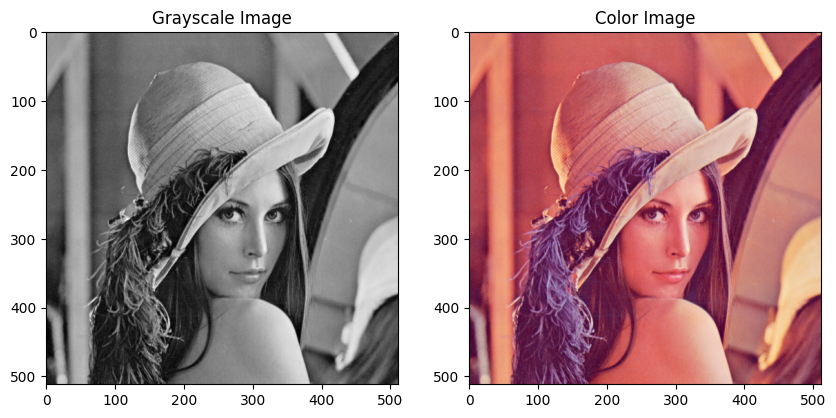

In [ ]:
import numpy as np
import cv2  # openCV
import matplotlib.pyplot as plt

image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/2025_1 딥러닝/lena.bmp', cv2.IMREAD_GRAYSCALE).astype('float32')
image_c = cv2.imread('/content/drive/MyDrive/Colab Notebooks/2025_1 딥러닝/lena.bmp')
image_c = cv2.cvtColor(image_c, cv2.COLOR_BGR2RGB)

plt.subplots(1, 2, figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Grayscale Image')

plt.subplot(1, 2, 2)
plt.imshow(image_c)
plt.title('Color Image')
plt.show()


# Image Format (RGB)
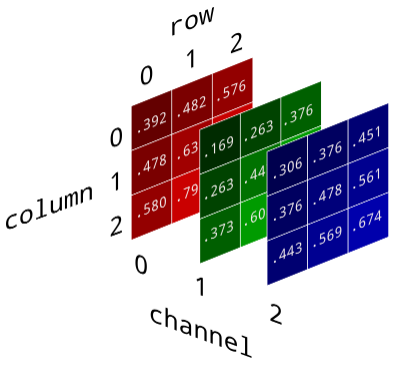

###  Coordinate system & Image Crop
* (0,0) is the upper left corner
* Image cropping using slicing

In [ ]:
cropped_image = image_c[0:128,128:256,:]
#cropped_image = image_c[:,:,2]=0

#plt.imshow(cropped_image)

# image size?
print(image_c.shape)
# image value at [100,100] ?
print(image_c[100,100,:])
# image sub-sampling?
cropped_image = image_c[::2,::2,:]
plt.show(cropped_image)


(512, 512, 3)
[178  68   0]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Rotating images
Rotating an image is done via the rotate function of the Image class.

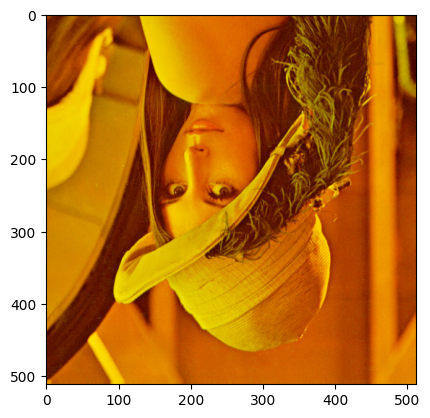

In [ ]:
####### YOUR CODE HERE #######
image_r=cv2.rotate(image_c,cv2.ROTATE_180)
plt.imshow(image_r)